### 1. 데이타 로드

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets

print(tf.__version__)

# 손글씨 이미지 데이타 
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

2.5.0
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


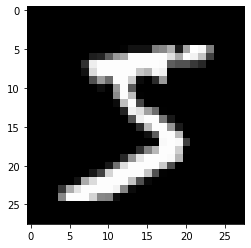

In [4]:
# 샘플 이미지 확인
import matplotlib.pylab as plt

plt.imshow(x_train[0], cmap='gray')


### 2. 데이타 전처리

In [11]:
#  정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


채널추가

   - mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성된다
   - CNN 모델에 주입하기 위해 색상을 나타내는 채널을 추가한다
   - (60000, 28, 28) 형태가 (60000, 28, 28, 1)로 변환한다


In [13]:
# 채널추가
print(x_train.shape, x_test.shape)

x_train_in = x_train[..., tf.newaxis]
x_test_in = x_test[..., tf.newaxis]

print(x_train_in.shape, x_test_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## 3. 모델 생성 및 학습(훈련)



<img src='imgs/cnn구조.PNG'>


[그림] 파이썬 딥러닝 텐서플로 (정보문화사)

In [24]:
model = tf.keras.Sequential([
    # Convolution  적용
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool'),
    # 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [26]:
history = model.fit(x_train_in, y_train, epochs=10, validation_data=(x_test_in, y_test))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2143 - accuracy: 0.9399 - val_loss: 0.0840 - val_accuracy: 0.9762
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0813 - accuracy: 0.9762 - val_loss: 0.0678 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0623 - accuracy: 0.9816 - val_loss: 0.0613 - val_accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.0547 - val_accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0546 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0490 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0528 - val_ac

## 4. 정확도

In [27]:
model.evaluate(x_test_in, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9840


[0.05791645497083664, 0.984000027179718]

### [ 참고 ] 모델 구조 파악


<img src='imgs/cnn구조2.PNG'>


- (28,28,1)형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 텐서형태로 변환한다
    - (3,3) 크기의 합성곱 필터를 사용하기 때문에 이미지 가로, 세로 크기가 2개씩 줄어든다
    - 서로 다른 32개의 필터를 적용했기 때문에 (26,26) 크기의 특성맵이 32개 생성된다
    - 즉 (28,28,1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 특징을 추출한다
   
- 풀링 레이어를 거치면서 (13,13,32) 텐서 형태로 변환한다.
    - (2,2) 크기의 풀링을 적용하여 이미지 크기가 1/2로 줄어든다
    
- Flatten 층에서 3차원 텐서를 1차원 텐서로 변환한다
    - 13 * 13 * 32로 5408 의 1차원 벡터가 된다
    
- 출력 노드가 10개인 Dense 레이어로 보내서 최종 값을 분류한다


In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 26, 26, 32)        320       
_________________________________________________________________
pool (MaxPooling2D)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
